In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'

In [2]:
import kbrgan
import kbrgan.kernel as kernel
import kbrgan.main as main
import kbrgan.embed as embed
import kbrgan.util as util

import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.stats as stats
import torch
import torchvision

/home/wgondal/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# font options
font = {
    #'family' : 'normal',
    #'weight' : 'bold',
    'size'   : 18
}

plt.rc('font', **font)
plt.rc('lines', linewidth=2)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## DCGAN

Code based on https://github.com/eriklindernoren/PyTorch-GAN/blob/master/implementations/dcgan/dcgan.py

In [4]:
import kbrgan.fashion_mnist.dcgan as fashion_dcgan

In [11]:
options = {
    'n_epochs': 40,
    'batch_size': 2**6,
}
dcgan = fashion_dcgan.DCGAN(**options)

model_fname = 'fashion_dcgan_ep{}_bs{}.pt'.format(options['n_epochs'], options['batch_size'])
model_fpath = os.path.join(dcgan.prob_model_dir, model_fname)

/home/wgondal/kbrgan/prob_models/fashion_dcgan


In [6]:
dcgan.train()

/home/wgondal/kbrgan/data/fashion


/home/wgondal/miniconda3/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


[Epoch 0/40] [Batch 0/938] [D loss: 0.693379] [G loss: 0.675384]
[Epoch 0/40] [Batch 1/938] [D loss: 0.693322] [G loss: 0.675932]
[Epoch 0/40] [Batch 2/938] [D loss: 0.693276] [G loss: 0.676553]
[Epoch 0/40] [Batch 3/938] [D loss: 0.693251] [G loss: 0.677198]
[Epoch 0/40] [Batch 4/938] [D loss: 0.693175] [G loss: 0.677700]
[Epoch 0/40] [Batch 5/938] [D loss: 0.693124] [G loss: 0.678402]
[Epoch 0/40] [Batch 6/938] [D loss: 0.693110] [G loss: 0.678890]
[Epoch 0/40] [Batch 7/938] [D loss: 0.693019] [G loss: 0.679451]
[Epoch 0/40] [Batch 8/938] [D loss: 0.693036] [G loss: 0.680060]
[Epoch 0/40] [Batch 9/938] [D loss: 0.692842] [G loss: 0.680649]
[Epoch 0/40] [Batch 10/938] [D loss: 0.692796] [G loss: 0.681154]
[Epoch 0/40] [Batch 11/938] [D loss: 0.692824] [G loss: 0.681895]
[Epoch 0/40] [Batch 12/938] [D loss: 0.692532] [G loss: 0.682270]
[Epoch 0/40] [Batch 13/938] [D loss: 0.692407] [G loss: 0.682772]
[Epoch 0/40] [Batch 14/938] [D loss: 0.692221] [G loss: 0.683105]
[Epoch 0/40] [Batch 

KeyboardInterrupt: 

In [ ]:
# save the generator
g = dcgan.generator
g.save(model_fpath)


In [32]:
model_fpath = '/home/wgondal/kbrgan/prob_models/fashion_dcgan/fashion_dcgan_ep_35_bs64.pt'

## Load a trained model

In [33]:
# load a model
generator = fashion_dcgan.Generator.load(model_fpath, map_location=lambda storage, loc: storage)

In [34]:
# generate images
n_gen = 8*5
with torch.no_grad():
    zte = dcgan.sample_noise(n_gen)
    gen = generator(zte)

/home/wgondal/miniconda3/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


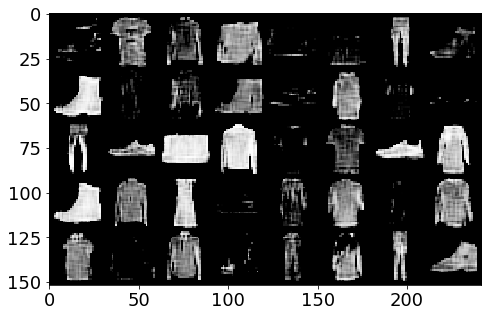

In [35]:
# https://gist.github.com/anonymous/bf16430f7750c023141c562f3e9f2a91
def show_img(img):
    npimg = img.clamp(0, 1).numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')
    
plt.figure(figsize=(8, 5))
img = torchvision.utils.make_grid(gen, nrow=8)
show_img(img)